In [105]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [154]:
twitter_list = []

In [155]:
# Loop through 5 pages of tweets (total 100 tweets)
for key, value in target_dict.items():
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(key, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            text = tweet['text']
            time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet['text'])
            
            comp_score = results['compound']
            pos_score = results['pos']
            neu_score = results['neu']
            neg_score = results['neg']

            twitter_list.append({'source': key, 'tweet': text, 'created_at': time, 'compound': comp_score, 'positive': pos_score,
                                'neutral': neu_score, 'negative': neg_score})

In [156]:
twitter_list

[{'source': '@CNN',
  'tweet': '"Even before Archbishop Carlo Maria Vigano called for Pope Francis to resign on Sunday, the two men had a history,… https://t.co/29qTQ9j8hI',
  'created_at': datetime.datetime(2018, 8, 28, 2, 16, 6, tzinfo=datetime.timezone.utc),
  'compound': -0.34,
  'positive': 0.0,
  'neutral': 0.888,
  'negative': 0.112},
 {'source': '@CNN',
  'tweet': 'Two of the first 16 people to receive an experimental treatment for Ebola have recovered in the current outbreak in… https://t.co/9zRIox285E',
  'created_at': datetime.datetime(2018, 8, 28, 2, 8, 4, tzinfo=datetime.timezone.utc),
  'compound': 0.0,
  'positive': 0.0,
  'neutral': 1.0,
  'negative': 0.0},
 {'source': '@CNN',
  'tweet': 'A Texas high school senior battling brain cancer has won the fight to wear her blue-black wig after school official… https://t.co/LX9gFXdFFj',
  'created_at': datetime.datetime(2018, 8, 28, 2, 1, 9, tzinfo=datetime.timezone.utc),
  'compound': -0.6597,
  'positive': 0.128,
  'neutral':

In [184]:
tweet_df = pd.DataFrame(twitter_list)
tweet_df.head()

,compound,created_at,negative,neutral,positive,source,tweet
0,-0.3400,2018-08-28 02:16:06+00:00,0.112,0.888,0.000,@CNN,"""Even before Archbishop Carlo Maria Vigano cal..."
1,0.0000,2018-08-28 02:08:04+00:00,0.000,1.000,0.000,@CNN,Two of the first 16 people to receive an exper...
2,-0.6597,2018-08-28 02:01:09+00:00,0.316,0.556,0.128,@CNN,A Texas high school senior battling brain canc...
3,0.0000,2018-08-28 01:51:04+00:00,0.000,1.000,0.000,@CNN,A panel of three federal judges in North Carol...
4,0.5994,2018-08-28 01:46:00+00:00,0.000,0.803,0.197,@CNN,“We are our own roadblocks.” Brit + Co founder...


In [185]:
# reorganize df
tweet_df = tweet_df[['tweet', 'source', 'created_at', 'compound', 'positive', 'neutral', 'negative']]
tweet_df.head()

,tweet,source,created_at,compound,positive,neutral,negative
0,"""Even before Archbishop Carlo Maria Vigano cal...",@CNN,2018-08-28 02:16:06+00:00,-0.3400,0.000,0.888,0.112
1,Two of the first 16 people to receive an exper...,@CNN,2018-08-28 02:08:04+00:00,0.0000,0.000,1.000,0.000
2,A Texas high school senior battling brain canc...,@CNN,2018-08-28 02:01:09+00:00,-0.6597,0.128,0.556,0.316
3,A panel of three federal judges in North Carol...,@CNN,2018-08-28 01:51:04+00:00,0.0000,0.000,1.000,0.000
4,“We are our own roadblocks.” Brit + Co founder...,@CNN,2018-08-28 01:46:00+00:00,0.5994,0.197,0.803,0.000


In [186]:
tweet_df = tweet_df.sort_values(['source', 'created_at'], ascending=False).reset_index()
del tweet_df['index']
tweet_df.head()

,tweet,source,created_at,compound,positive,neutral,negative
0,RT @nytopinion: If Republicans retain control ...,@nytimes,2018-08-28 02:17:01+00:00,0.0000,0.000,1.000,0.000
1,Read John McCain's farewell statement https://...,@nytimes,2018-08-28 02:02:03+00:00,0.0000,0.000,1.000,0.000
2,"RT @tripgabriel: Rep. Hunter, who sometimes vi...",@nytimes,2018-08-28 01:51:02+00:00,0.0000,0.000,1.000,0.000
3,Did Juul try to lure teenagers to its sleek e-...,@nytimes,2018-08-28 01:41:06+00:00,0.0000,0.000,1.000,0.000
4,"""The suspect clearly targeted other gamers."" T...",@nytimes,2018-08-28 01:30:13+00:00,-0.2263,0.121,0.673,0.206


In [187]:
tweet_df.to_csv('recent_news_tweets')

In [160]:
# ensure each news source has 100 tweets
tweet_df.loc[tweet_df['source']=='@CNN', :].count()

tweet         100
source        100
created_at    100
compound      100
positive      100
neutral       100
negative      100
dtype: int64

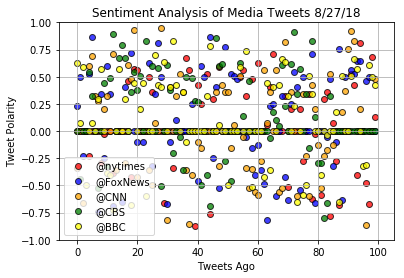

In [188]:
colors = ['red', 'blue', 'orange', 'green', 'yellow']
sources = tweet_df['source'].unique()
x = 0
for source in sources:
    plt.scatter(np.arange(0,100), tweet_df.loc[tweet_df['source']==source,:]['compound'], color=colors[x], alpha=0.75, edgecolors='black', label=source)
    x +=1
plt.grid()
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Media Tweets 8/27/18")
plt.legend(loc="best")
plt.savefig('graphs/scatter.png')

In [171]:
# group df by source to get average polarity scores
tweet_group = tweet_df.groupby(['source']).mean().reset_index()
tweet_group

,source,compound,positive,neutral,negative
0,@BBC,0.101223,0.08385,0.87726,0.03890
1,@CBS,0.126417,0.07962,0.88855,0.03183
2,@CNN,0.044319,0.08178,0.85318,0.06503
3,@FoxNews,0.085769,0.10744,0.81949,0.07303
4,@nytimes,0.044619,0.06531,0.88220,0.05247


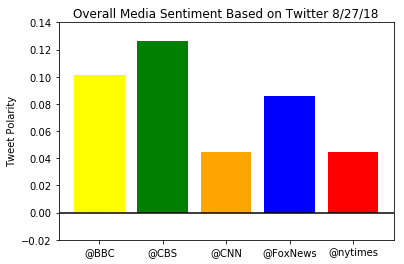

In [180]:
colors = ['yellow', 'green', 'orange', 'blue', 'red']

plt.bar(tweet_group['source'], tweet_group['compound'], color=colors)
plt.ylabel("Tweet Polarity")
plt.ylim(-0.02, 0.14)
plt.axhline(y=0, color='black')
plt.title("Overall Media Sentiment Based on Twitter 8/27/18")
plt.savefig('graphs/bar.png')